In [12]:
! pip install -q torchview
! pip install -q -U graphviz

In [13]:
from torchview import draw_graph
import torchtext
from torch import nn
import torch
import graphviz

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

'png'

This notebook is to demonstrate torchview package on famous NLP models

* RNN rolled
* RNN unrolled
* BERT-like model (ROBERTA)

In [14]:
class SimpleRNN(nn.Module):
    """Simple RNN"""

    def __init__(self, inplace: bool = True) -> None:
        super().__init__()
        self.hid_dim = 2
        self.input_dim = 3
        self.max_length = 4
        self.lstm = nn.LSTMCell(self.input_dim, self.hid_dim)
        self.activation = nn.LeakyReLU(inplace=inplace)
        self.projection = nn.Linear(self.hid_dim, self.input_dim)

    def forward(self, token_embedding: torch.Tensor) -> torch.Tensor:
        b_size = token_embedding.size()[0]
        hx = torch.randn(b_size, self.hid_dim, device=token_embedding.device)
        cx = torch.randn(b_size, self.hid_dim, device=token_embedding.device)

        for _ in range(self.max_length):
            hx, cx = self.lstm(token_embedding, (hx, cx))
            hx = self.activation(hx)

        return hx

In [15]:
model_graph_1 = draw_graph(
    SimpleRNN(), input_size=(2, 3),
    graph_name='RecursiveNet',
    roll=True
)

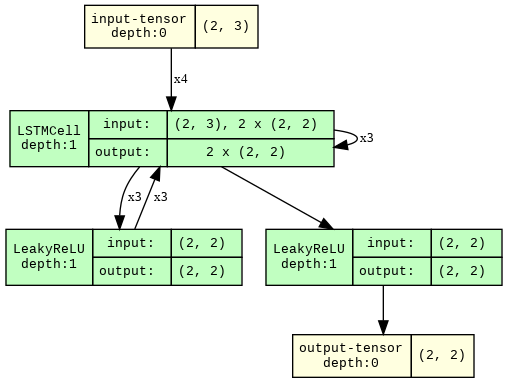

In [16]:
model_graph_1.visual_graph

In [17]:
model_graph_2 = draw_graph(
    SimpleRNN(), input_size=(2, 3),
    graph_name='RecursiveNet',
    roll=False
)

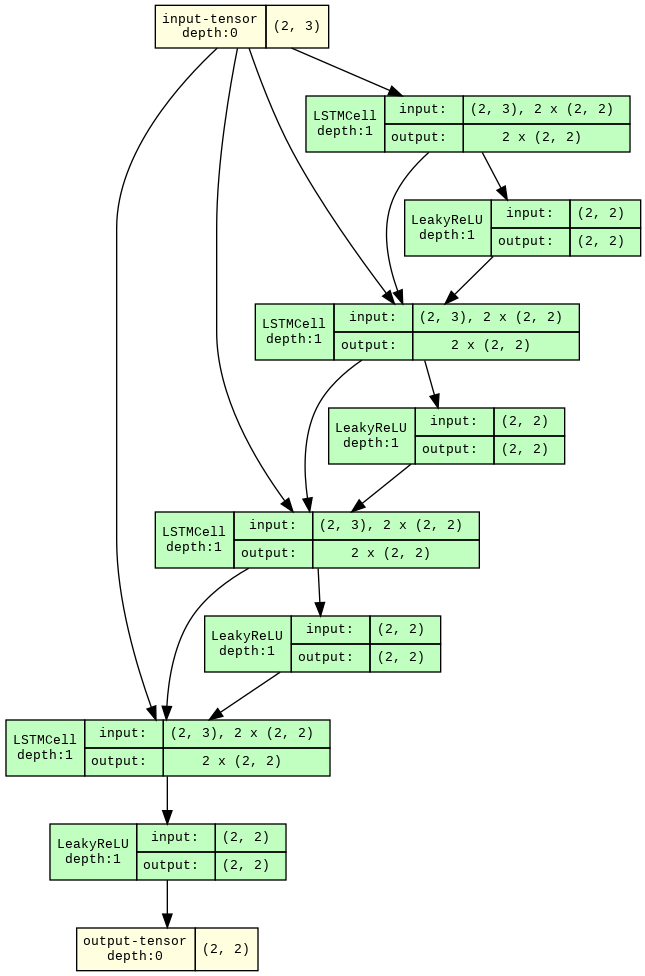

In [18]:
model_graph_2.visual_graph

In [19]:
xlmr_base = torchtext.models.ROBERTA_BASE_ENCODER
model = xlmr_base.get_model(load_weights=False)
transform = xlmr_base.transform()
input_batch = ["Hello world", "How are you!"]
model_input = torchtext.functional.to_tensor(
transform(input_batch), padding_value=1)

model_graph3 = draw_graph(
    model, model_input,
    graph_name='Roberta',
    depth=4,
)

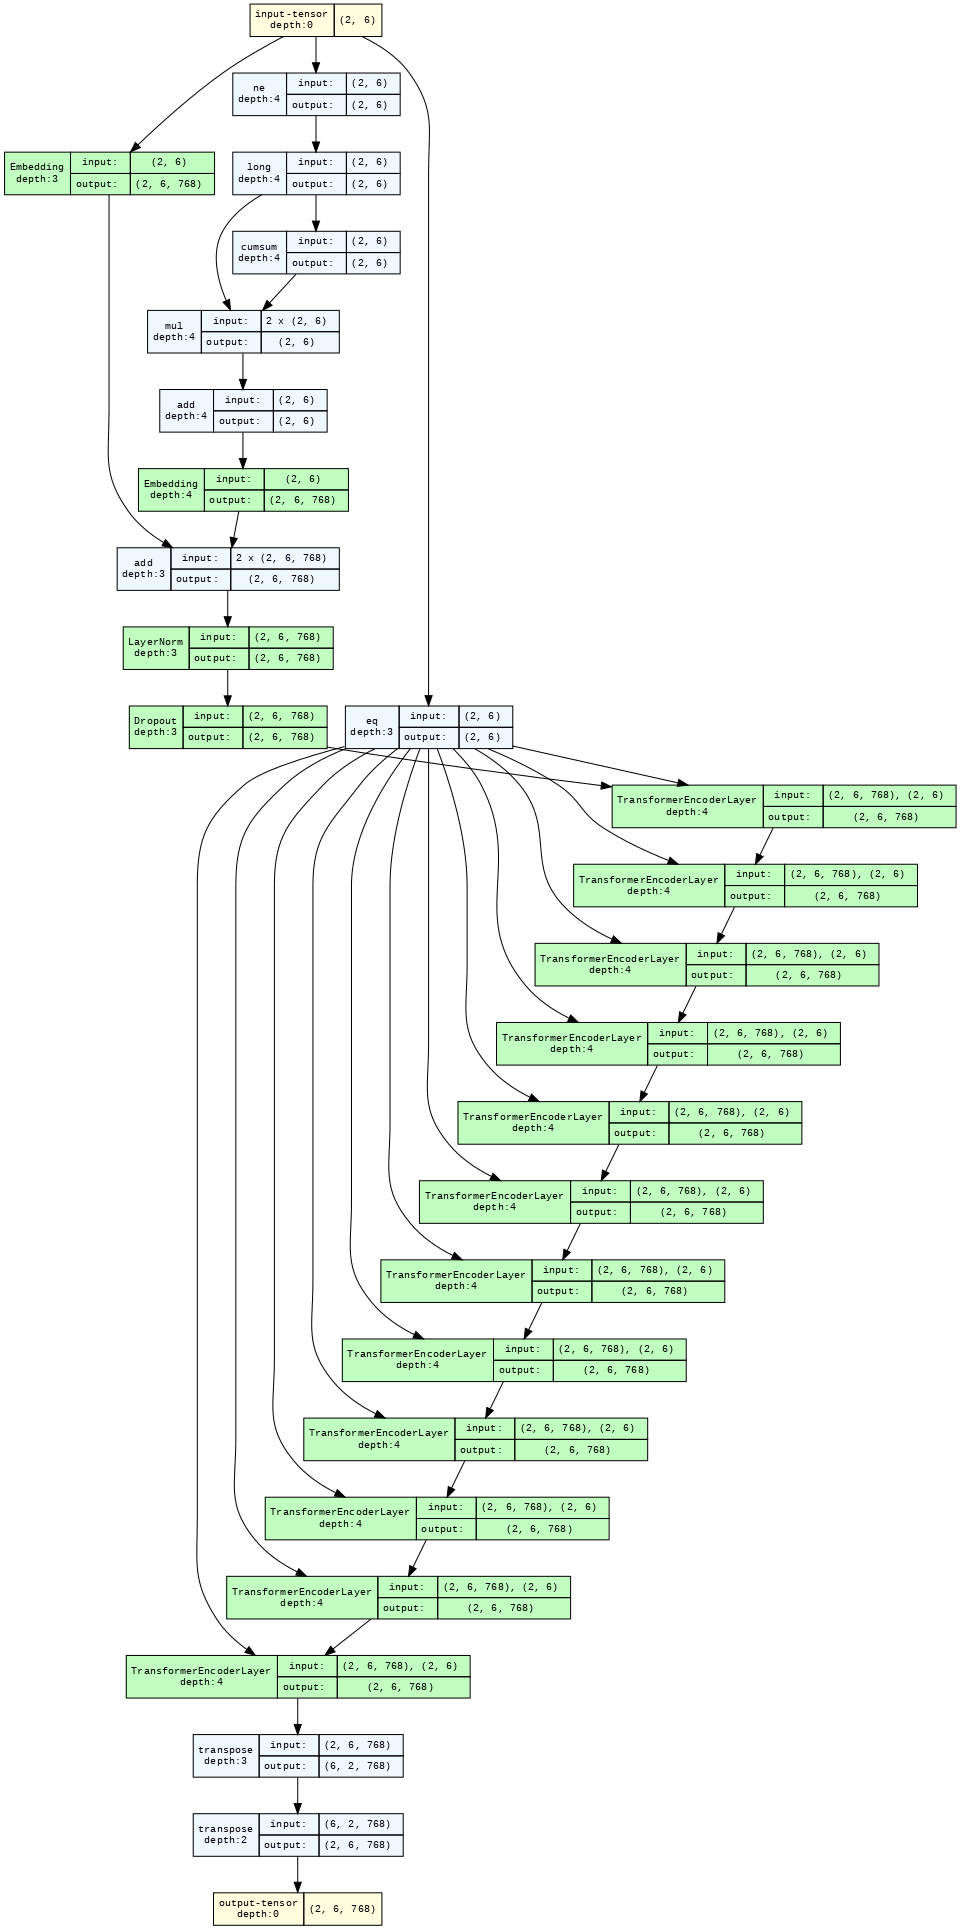

In [20]:
model_graph3.visual_graph

We can also nested modules

In [21]:
model_graph4 = draw_graph(
    model, model_input,
    graph_name='Roberta',
    depth=4,
    expand_nested=True,
)

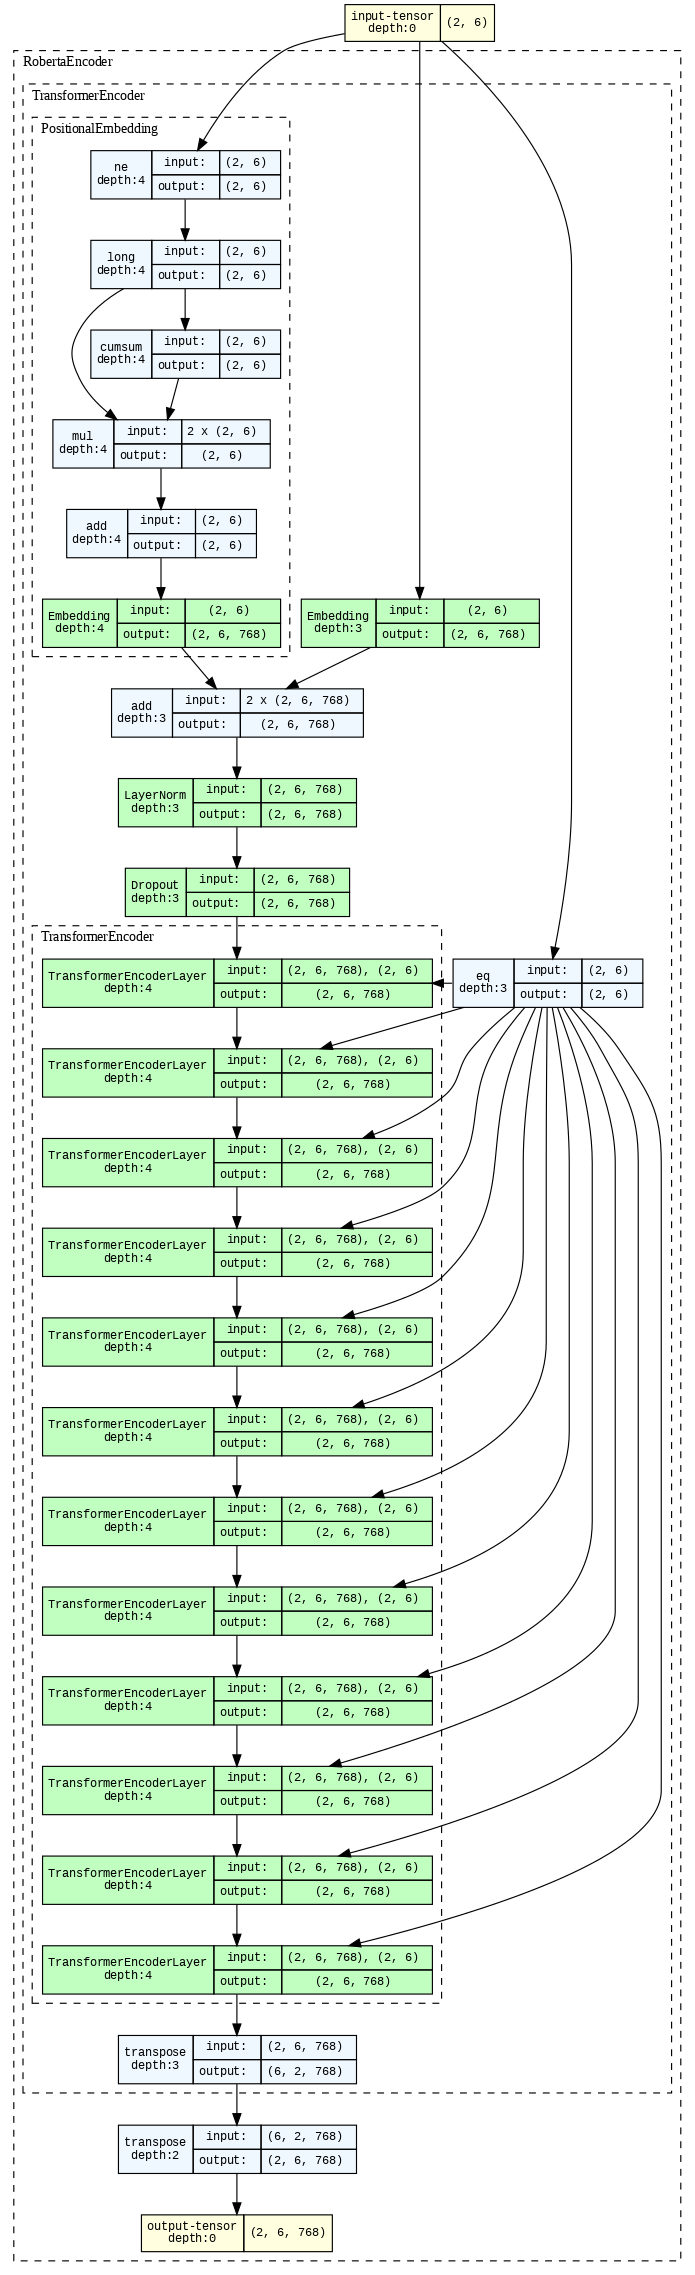

In [22]:
model_graph4.visual_graph